# Factor Analysis

## What is factor analysis?

Factor analysis is a method for dimensionality reduction. The idea is to reduce the observed variables to fewer latent (unobservable) variables (the factors) that have a shared variance. [1,2]

## What are the relationships between covariance matrix, factor analysis, and principal component analysis (PCA)?


### Covariance matrix
The covariance matrix has as entries the covariances between variables $\{X_1\},...,\{X_n\}$, i.e. $V_{ij} = cov(x_i,x_j) = \langle (x_i-\mu_i)(x_j-\mu_j)\rangle$, where $\mu$ denotes the mean. [3]

### Principal component analysis
PCA is also a method to reduce dimensionality in data but it finds the smaller set of new variables (the principal components) by transforming the data into a new coordinate system. In comparison to PA it finds composites of the observed variables while PA finds new latent variables. These principle components can be calculated using the covariance matrix as they are just the eigenvectors of the matrix. [4,5]

### Example of PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given the following random data set with two measurements
data = np.random.RandomState(0).multivariate_normal(mean=[0,0], cov=[[3,3],[3,9]], size=500)
df = pd.DataFrame(data)
df

,0,1
0,-2.650605,-5.012940
1,-3.943227,-1.757110
2,-1.090366,-6.017766
3,-0.978242,-2.886002
4,-0.376462,0.513496
...,...,...
495,-0.759128,-1.213342
496,0.684185,2.485882
497,-0.859760,-0.645418
498,0.127626,0.634409


In [2]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,0,1
0,1.000000,0.558465
1,0.558465,1.000000


In [3]:
# Calculate the covariance matrix (this should be close to the defined matrix [[3,3],[3,9]]):
cov_matrix = df.cov()
cov_matrix

,0,1
0,2.896652,2.785961
1,2.785961,8.591345


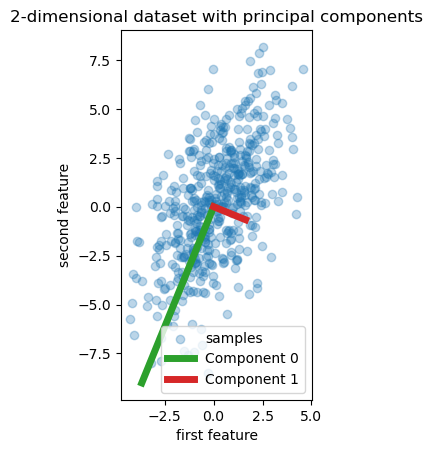

In [4]:
from sklearn.decomposition import PCA

pca = PCA(2).fit(df)

# Code for plotting adapted from [6]
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

In [5]:
# The principal components are eigenvectors of the covariance matrix:
print(pca.components_)
print(np.linalg.eig(cov_matrix)[1])

[[-0.37764429 -0.92595075]
 [ 0.92595075 -0.37764429]]
[[-0.92595075 -0.37764429]
 [ 0.37764429 -0.92595075]]


### Example of factor analysis


 Unrotated FA :

[[-1.11441098  0.80557258]
 [-2.73243817 -0.32854867]]

 Varimax FA :

[[-0.88676402  1.05095604]
 [-2.73086723  0.34136014]]

 Quartimax FA :

[[-1.01272572  0.9301858 ]
 [-2.7521101  -0.00724951]]


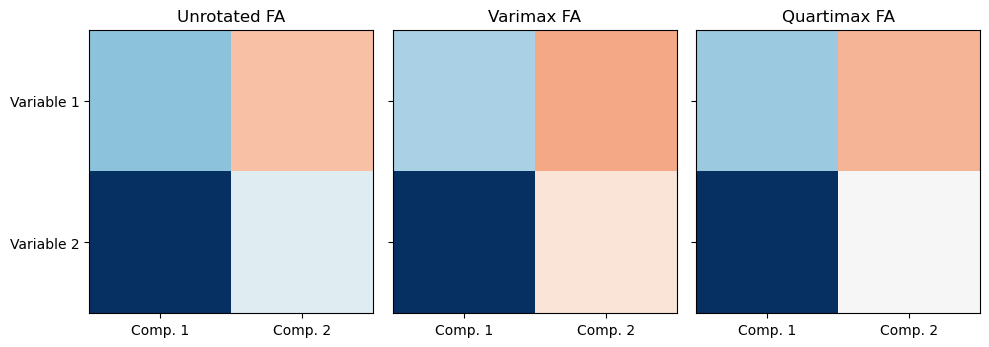

In [6]:
from sklearn.decomposition import FactorAnalysis

# Code for plotting adapted from [10]

fa = FactorAnalysis(2).fit(df)

n_comps = 2
feature_names = ["Variable 1","Variable 2"]

methods = [
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
    ("Quartimax FA", FactorAnalysis(rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(data)

    components = fa.components_.T
    print("\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
plt.tight_layout()
plt.show()

## What do we mean with loadings?
Loadings describe how much a variable is related to a given factor. Mathematically, FA finds factors in the factor matrix $F$ and loadings in the loading matrix $L$ such that $X - \Mu = L F + \epsilon$, where $X$ is the observed data, $\Mu$ the means, and $\epsilon$ the error terms [7].
The loadings are represented in the example above by the heatmap between the variables and factors.

## Why are factors orthogonal to each other? What’s the consequence?

The factors are orthogonal to each other as they are uncorrelated. This allows for rotation of the coordinate system such that each point loads strongly on only one factor, making it easier to interpret, without changing the variables' correlation. [7]
This can be seen in the example above with varimax, a rotation that maximizes the squared variances of the loadings. [10]

## How can we use factor analysis as a generative model?

Using the formula from above, FA can be used as a generative model:

$X - \Mu = L F + \epsilon$, so 

$X = L F + \Mu + \epsilon$

## What is the relationship between factor analysis and autoencoder?

Autoencoder is a neural network similar to FA in that it can be used for dimensionality reduction. It learns an encoding function to transform the input and a decoding function that recreates the input from the encoding, which reduces dimensionality if the code space has fewer dimensions than the input/output. Unlike FA, it does not need to find linear factors but can find a nonlinear manifold. It can therefore be understood as a generalized FA. [8,9]

## How would you explain factor analysis to yourself half a year ago?

In very simple terms, FA is a mathematical method to find a few underlying latent factors explaining the data observed. These can be used to create a model with fewer variables.

## Sources
[1] Yong, A. G., & Pearce, S. (2013). A Beginner’s Guide to Factor Analysis: Focusing on Exploratory Factor Analysis. Tutorials in Quantitative Methods for Psychology, 9(2), 79–94. https://doi.org/10.20982/tqmp.09.2.p079

[2] DATAtab (Director). (2021, October 26). Exploratory Factor Analysis. https://www.youtube.com/watch?v=Ollp2nSQCLY

[3] Weisstein, E. W. (n.d.). Covariance Matrix [Text]. Wolfram Research, Inc. Retrieved June 8, 2023, from https://mathworld.wolfram.com/

[4] Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions. Series A, Mathematical, Physical, and Engineering Sciences, 374(2065), 20150202. https://doi.org/10.1098/rsta.2015.0202

[5] Principal component analysis. (2023). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Principal_component_analysis&oldid=1158663594

[6] Principal Component Regression vs Partial Least Squares Regression. (n.d.). Scikit-Learn. Retrieved June 8, 2023, from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html

[7] Factor analysis. (2023). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Factor_analysis&oldid=1157490161

[8] Autoencoder. (2023). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Autoencoder&oldid=1153796242

[9] dk14. (2020). Factor Analysis vs Autoencoders. https://stats.stackexchange.com/q/261270

[10] Factor Analysis (with rotation) to visualize patterns. (n.d.). Scikit-Learn. Retrieved June 9, 2023, from https://scikit-learn/stable/auto_examples/decomposition/plot_varimax_fa.html